In [1]:
# 단계 1: 폰트 설치
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
!apt-get -qq -y install fonts-nanum > /dev/null
#fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'

#font = fm.FontProperties(fname=fontpath, size=9)

#fm._rebuild()



fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'}) # 폰트 설

In [ ]:
# 단계 2: 런타임 재시작
import os
os.kill(os.getpid(), 9)

In [1]:
# 단계 3: 한글 폰트 설정
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

# 마이너스 표시 문제
mpl.rcParams['axes.unicode_minus'] = False

# 한글 폰트 설정
fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'}) # 폰트 설

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 불러오기
file_path = '/content/최종_병합된_데이터.csv'  # 파일 경로
data = pd.read_csv(file_path)

# '기준년월'에서 연도와 월 추출
data['기준년월'] = data['기준년월'].astype(str)
data['연도'] = data['기준년월'].str[:4].astype(int)
data['월'] = data['기준년월'].str[4:6]

# 2023년 11월, 12월 데이터를 활용하여 2024년 데이터를 대체
data_2023_nov_dec = data[(data['연도'] == 2023) & (data['월'].isin(['11', '12']))]
nov_dec_replacement = data_2023_nov_dec.groupby('구분')['방문자수'].sum()

new_rows = []
for month in ['11', '12']:
    for group in ['내국인', '외국인']:
        # 기존 데이터가 있으면 방문자수 합산
        existing_rows = data[
            (data['기준년월'] == f'2024{month}') & (data['구분'] == group)
        ]
        if not existing_rows.empty:
            data.loc[
                (data['기준년월'] == f'2024{month}') & (data['구분'] == group),
                '방문자수'
            ] += nov_dec_replacement.get(group, 0)
        else:
            # 기존 데이터가 없으면 새로 추가
            new_row = {
                '기준년월': f'2024{month}',
                '구분': group,
                '방문자수': nov_dec_replacement.get(group, 0),
                **{col: 0 for col in data.columns if col not in ['기준년월', '구분', '방문자수', '연도', '월']}
            }
            new_rows.append(new_row)

# 새 데이터 추가
if new_rows:
    new_data = pd.DataFrame(new_rows)
    data = pd.concat([data, new_data], ignore_index=True)

# 내국인/외국인 구분 데이터 추출
domestic_data = data[data['구분'] == '내국인']
foreign_data = data[data['구분'] == '외국인']

# 연도별 방문자수 집계
domestic_yearly_visitors = domestic_data.groupby('연도')['방문자수'].sum()
foreign_yearly_visitors = foreign_data.groupby('연도')['방문자수'].sum()

# 평균기온별 방문자수 집계
domestic_temperature_visitors = domestic_data.groupby('평균기온(℃)')['방문자수'].sum()
foreign_temperature_visitors = foreign_data.groupby('평균기온(℃)')['방문자수'].sum()

# 결과 출력 및 확인
print("연도별 내국인 방문자수:\n", domestic_yearly_visitors)
print("\n연도별 외국인 방문자수:\n", foreign_yearly_visitors)


연도별 내국인 방문자수:
 연도
2018.0    2.184643e+09
2019.0    2.139058e+09
2020.0    2.030480e+09
2021.0    2.086870e+09
2022.0    2.277390e+09
2023.0    2.257273e+09
2024.0    1.795582e+09
Name: 방문자수, dtype: float64

연도별 외국인 방문자수:
 연도
2018.0    20088048.0
2019.0    27351912.0
2020.0      680446.0
2021.0      597029.0
2022.0     1817696.0
2023.0     8977178.0
2024.0    13819473.0
Name: 방문자수, dtype: float64


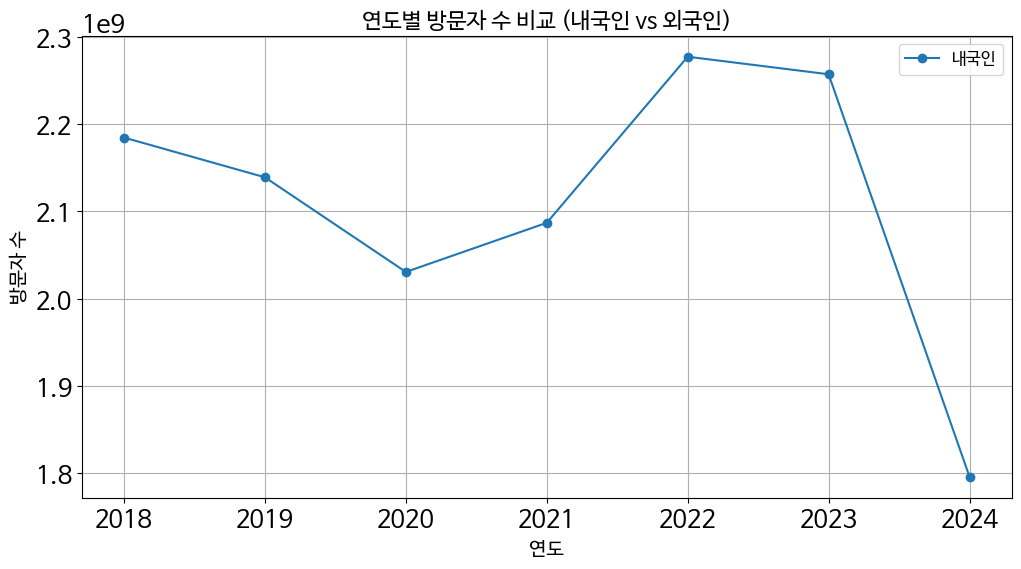

In [5]:
# 연도별 방문자 수 비교 시각화
plt.figure(figsize=(12, 6))
plt.plot(domestic_yearly_visitors.index, domestic_yearly_visitors.values, marker='o', label='내국인')
#plt.plot(foreign_yearly_visitors.index, foreign_yearly_visitors.values, marker='o', label='외국인')
plt.title('연도별 방문자 수 비교 (내국인 vs 외국인)', fontsize=16)
plt.xlabel('연도', fontsize=14)
plt.ylabel('방문자 수', fontsize=14)
plt.legend(fontsize=12)
plt.grid()
plt.show()


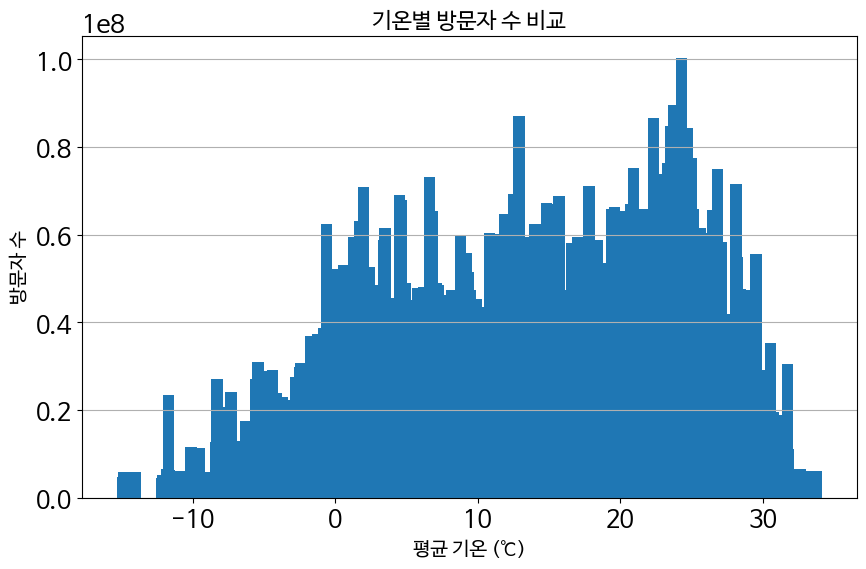

In [5]:
# 평균기온별 방문자수 시각화
plt.figure(figsize=(10, 6))
plt.bar(temperature_visitors.index, temperature_visitors.values, width=0.8)
plt.title('기온별 방문자 수 비교', fontsize=16)
plt.xlabel('평균 기온 (℃)', fontsize=14)
plt.ylabel('방문자 수', fontsize=14)
plt.grid(axis='y')
plt.show()


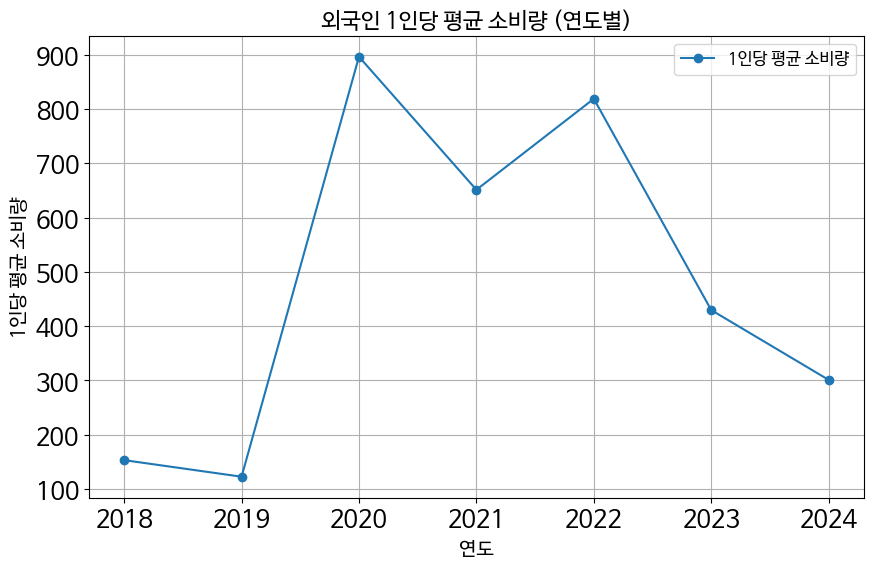

In [3]:
# 외국인의 연도별 총 소비량
foreign_total_spending = foreign_data.groupby('연도')['관광총소비'].sum().reset_index()

# 외국인의 연도별 방문자 수
foreign_visitors = foreign_data.groupby('연도')['방문자수'].sum().reset_index()

# 데이터 합치기
foreign_avg_spending = pd.merge(foreign_total_spending, foreign_visitors, on='연도')
foreign_avg_spending['1인당 평균 소비량'] = foreign_avg_spending['관광총소비'] / foreign_avg_spending['방문자수']

# 시각화
plt.figure(figsize=(10, 6))
plt.plot(foreign_avg_spending['연도'], foreign_avg_spending['1인당 평균 소비량'], marker='o', label='1인당 평균 소비량')
plt.title('외국인 1인당 평균 소비량 (연도별)', fontsize=16)
plt.xlabel('연도', fontsize=14)
plt.ylabel('1인당 평균 소비량', fontsize=14)
plt.grid()
plt.legend(fontsize=12)
plt.show()


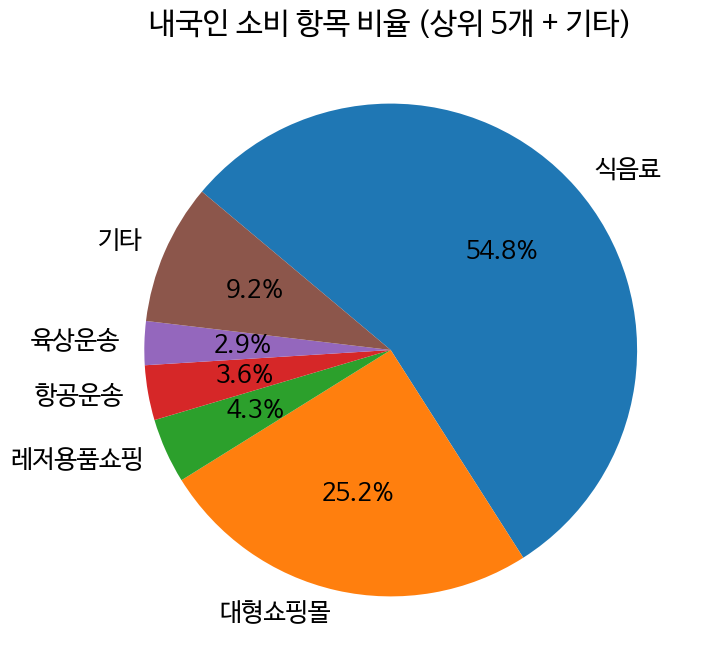

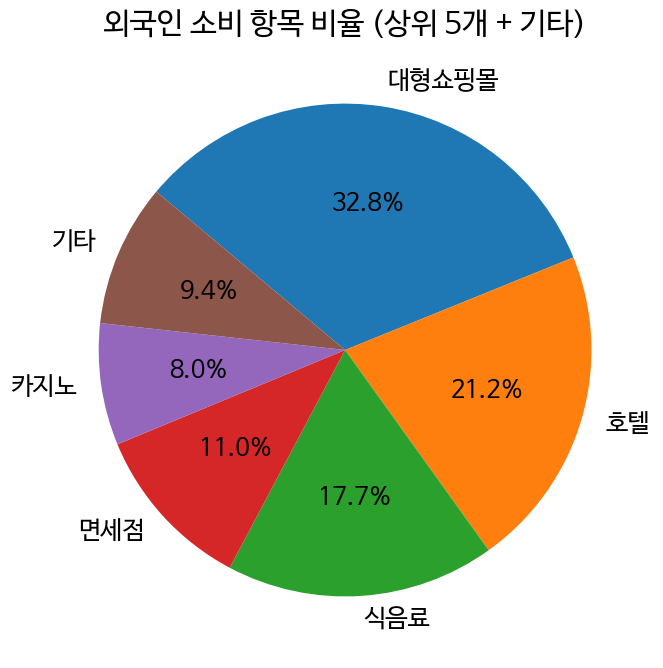

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 파일 경로 (업로드된 CSV 파일)
file_path = '/content/최종_병합된_데이터.csv'  # 파일 경로를 적절히 수정하세요

# CSV 파일 읽기
data = pd.read_csv(file_path)

# "관광총소비"를 제외한 소비 항목 선택 (3열부터 관광총소비 이전 열까지만 선택)
consumption_columns = data.columns[2:data.columns.get_loc('관광총소비')]

# 내국인과 외국인 데이터 분리
domestic_data = data[data['구분'] == '내국인']
foreign_data = data[data['구분'] == '외국인']

# 내국인 소비 항목 총합 계산
domestic_totals = domestic_data[consumption_columns].sum()
domestic_top_5 = domestic_totals.nlargest(5)
domestic_others = domestic_totals.drop(domestic_top_5.index).sum()
domestic_pie_data = pd.concat([domestic_top_5, pd.Series({'기타': domestic_others})])

# 외국인 소비 항목 총합 계산
foreign_totals = foreign_data[consumption_columns].sum()
foreign_top_5 = foreign_totals.nlargest(5)
foreign_others = foreign_totals.drop(foreign_top_5.index).sum()
foreign_pie_data = pd.concat([foreign_top_5, pd.Series({'기타': foreign_others})])

# 내국인 소비 파이 차트
plt.figure(figsize=(8, 8))
plt.pie(
    domestic_pie_data,
    labels=domestic_pie_data.index,
    autopct='%1.1f%%',
    startangle=140,
    counterclock=False
)
plt.title("내국인 소비 항목 비율 (상위 5개 + 기타)")
plt.show()

# 외국인 소비 파이 차트
plt.figure(figsize=(8, 8))
plt.pie(
    foreign_pie_data,
    labels=foreign_pie_data.index,
    autopct='%1.1f%%',
    startangle=140,
    counterclock=False
)
plt.title("외국인 소비 항목 비율 (상위 5개 + 기타)")
plt.show()
